In [25]:
%run ../ImportsConstantsSparkInit.ipynb
sc.setJobGroup("PLT_DayOfWeek", "PLT_DayOfWeek")

In [28]:
stateAcc_df = spark.read.format("mongo").option("collection", "AccidentCountByState").load().toPandas()
stateAcc_df = stateAcc_df.sort_values('AccidentCount', ascending=False)
display(stateAcc_df)

,AccidentCount,State,_id
30,795868,CA,"(646001ccd32ca37c8757dff6,)"
38,401388,FL,"(646001ccd32ca37c8757dff0,)"
18,149037,TX,"(646001ccd32ca37c8757e016,)"
12,126341,OR,"(646001ccd32ca37c8757e010,)"
20,113535,VA,"(646001ccd32ca37c8757e018,)"
9,108049,NY,"(646001ccd32ca37c8757e00d,)"
13,99975,PA,"(646001ccd32ca37c8757e011,)"
28,97185,MN,"(646001ccd32ca37c8757e001,)"
2,91362,NC,"(646001ccd32ca37c8757e006,)"
15,89216,SC,"(646001ccd32ca37c8757e013,)"


In [4]:
path = "./tl_2022_us_state/tl_2022_us_state.shp"
df = gpd.read_file(path)
df = df.to_crs("EPSG:4326")
df = df.merge(stateAcc_df, left_on="STUSPS", right_on="State")
df = df.drop("State", 1)
display(df)
#df.info()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,AccidentCount,_id
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...",7632,"(646001cdd32ca37c8757e01c,)"
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...",401388,"(646001ccd32ca37c8757dff0,)"
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282...",47105,"(646001ccd32ca37c8757dff3,)"
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998...",97185,"(646001ccd32ca37c8757e001,)"
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243...",65085,"(646001ccd32ca37c8757dfff,)"
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677763373,1323686975,+41.5964850,-071.5264901,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ...",4451,"(646001ccd32ca37c8757e012,)"
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049908397,2391592787,+44.3484222,-114.5588538,"POLYGON ((-116.35844 49.00047, -116.34805 49.0...",8544,"(646001ccd32ca37c8757dff5,)"
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23190126218,1025960758,+43.6726907,-071.5843145,"POLYGON ((-70.83887 43.24449, -70.83886 43.244...",3866,"(646001ccd32ca37c8757e009,)"
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125935585728,13453835222,+35.5397100,-079.1308636,"POLYGON ((-77.89977 36.54460, -77.89942 36.544...",91362,"(646001ccd32ca37c8757e006,)"
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23872569964,1030754610,+44.0589536,-072.6710173,"POLYGON ((-72.04187 44.15665, -72.04180 44.156...",365,"(646001ccd32ca37c8757e019,)"


In [5]:
non_continental = ['HI','VI','MP','GU','AK','AS','PR']
us49 = df
for n in non_continental:
    us49 = us49[us49.STUSPS != n]

C:\BigData\Anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
C:\BigData\Anaconda3\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


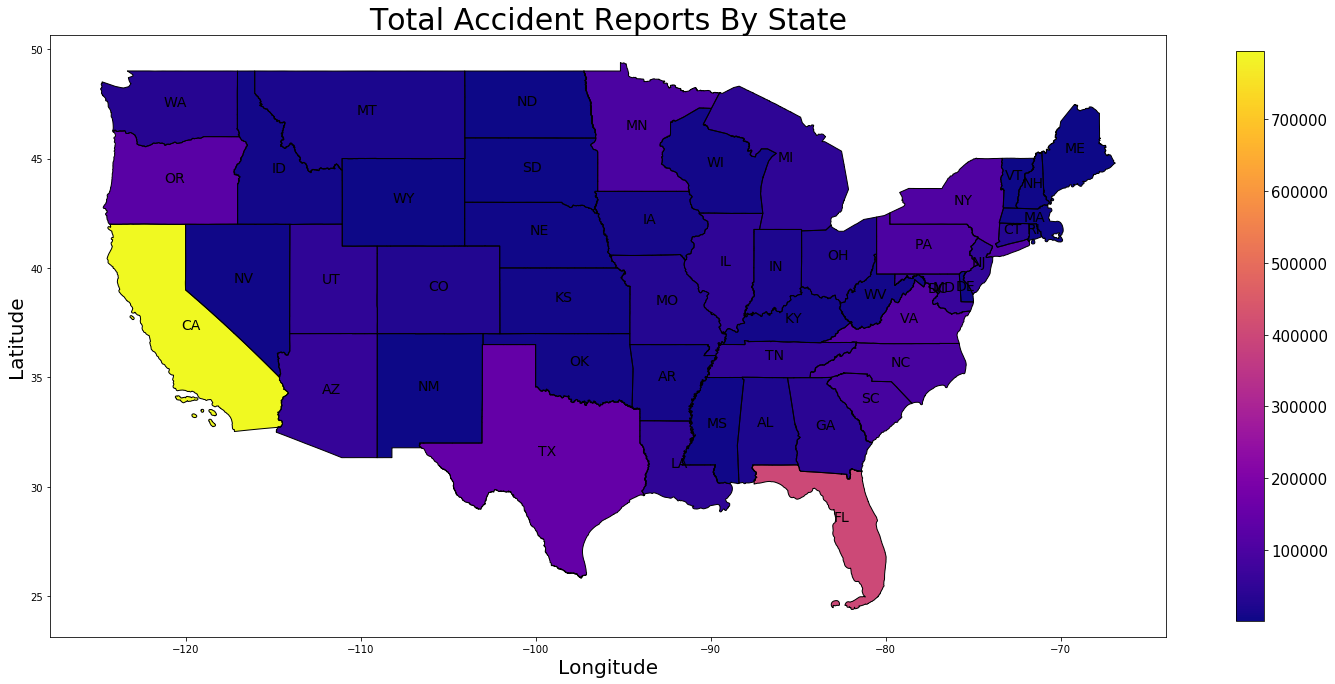

In [24]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
us49.plot(ax=ax, column="AccidentCount", cmap="plasma", legend=True, figsize=(25,15), legend_kwds={"shrink":.7})
us49.boundary.plot(ax=ax, color='Black', linewidth=1)
us49.apply(lambda x: ax.annotate(s=x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);
ax.set_title("Total Accident Reports By State", fontsize=30)
ax.set_xlabel("Longitude", fontsize=20)
ax.set_ylabel("Latitude", fontsize=20)
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=15)